In [37]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df= pd.read_excel("DryBeanDataset\Dry_Bean_Dataset.xlsx")

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, KFold

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [38]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

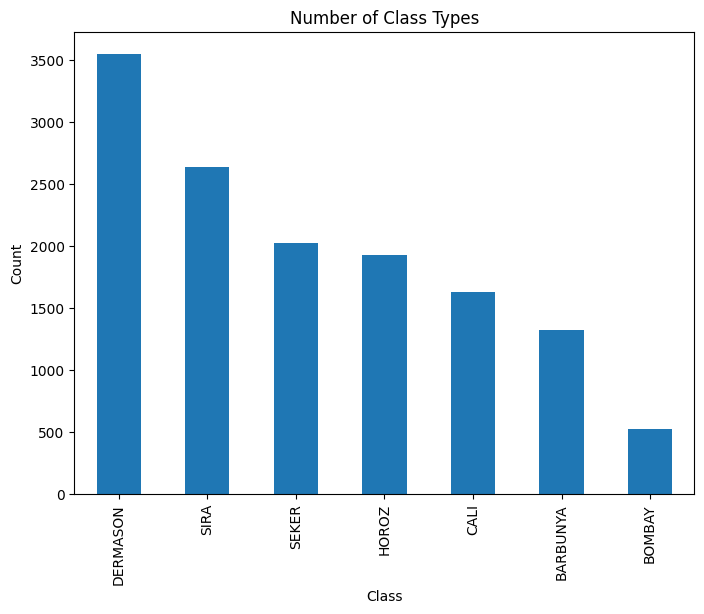

In [41]:

import matplotlib.pyplot as plt



# Count the occurrences of each class type
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Class Types')
plt.show()


In [42]:
#describing the dataset
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [4]:


# Separate the features (X) and the target variable (y) if applicable
X = df.drop('Class', axis=1)  

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3', 'PC4','PC5'])

# Concatenate the principal components with the target variable if applicable
df_pca = pd.concat([df_pca, df['Class']], axis=1)


# Display the resulting DataFrame
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5  Class
0 -4.981561  1.824697  0.749021 -0.390812 -0.033531  SEKER
1 -5.436792  2.932365  2.182374 -0.431960  1.226464  SEKER
2 -4.758088  1.826884  0.514038 -0.125854  0.131506  SEKER
3 -4.300541  2.003661  3.554447  0.082964  0.800766  SEKER
4 -6.349340  4.088205  1.179199 -0.830357 -0.037073  SEKER


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV


# Separate the features (X) and the target variable (y)
X = df_pca.drop('Class', axis=1)  e
y = df_pca['Class']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train)

# Defining the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10,100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Create an SVM classifier
svm = SVC()

# Create GridSearchCV instance
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")



            PC1       PC2       PC3       PC4       PC5
11073 -2.551592 -1.371708  0.490546 -0.948617 -0.238093
13172 -0.993749 -0.961459  0.934936 -0.782296  0.489140
11587 -3.315757  0.292179  0.449769 -0.544696 -0.211468
12492 -2.412019 -0.023120 -0.235748  0.621914 -0.186452
430   -2.579509  0.615592 -0.094694  0.508076  0.688849
...         ...       ...       ...       ...       ...
5191   3.750443  0.219945 -1.673024  1.052721 -0.020877
13418 -0.893090 -1.102168 -0.318061 -1.041121 -0.048565
5390   3.923818  0.907228 -1.592138  0.665333 -0.191400
860   -3.451901  2.134995  0.130128 -0.633506 -0.123450
7270   3.194350 -2.254307 -0.648192 -1.904573 -0.838654

[10888 rows x 5 columns]
Best Parameters:
C: 1
gamma: auto
kernel: rbf


In [55]:




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the desired parameters for the SVM model
svm_params = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale'
}

# Create an SVM classifier with the specified parameters
svm = SVC(**svm_params)

# Perform k-fold cross-validation on the training data
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores
scores = cross_val_score(svm, X_train, y_train, cv=kf)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold} Accuracy:", score)

# Calculate and print the average accuracy across all folds
average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)

# Train the SVM classifier on the entire training data
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate and print the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)



Fold 1 Accuracy: 0.9256198347107438
Fold 2 Accuracy: 0.9219467401285583
Fold 3 Accuracy: 0.9302112029384757
Fold 4 Accuracy: 0.9393939393939394
Fold 5 Accuracy: 0.9430670339761249
Fold 6 Accuracy: 0.9118457300275482
Fold 7 Accuracy: 0.9247015610651974
Fold 8 Accuracy: 0.9292929292929293
Fold 9 Accuracy: 0.9191176470588235
Fold 10 Accuracy: 0.9200367647058824
Average Accuracy: 0.9265233383298224
Test Accuracy: 0.9313257436650753


In [57]:
# storing values in excel here
predictions = pd.DataFrame({
    'id': X_test.index,
    'predicted_label': y_pred
})
predictions.to_csv('predictions1.csv', index=False)

In [58]:
y_pred = cross_val_predict(svm, X, y, cv=kf)

# Calculate and display the confusion matrix
confusion_mat = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1198    0   81    0    4   10   29]
 [   0  522    0    0    0    0    0]
 [  38    0 1550    0   27    3   12]
 [   0    0    0 3272    5   53  216]
 [   3    0   26   19 1842    0   38]
 [   7    0    0   39    1 1925   55]
 [   6    0    2  249   37   24 2318]]


Confusion matrix, without normalization


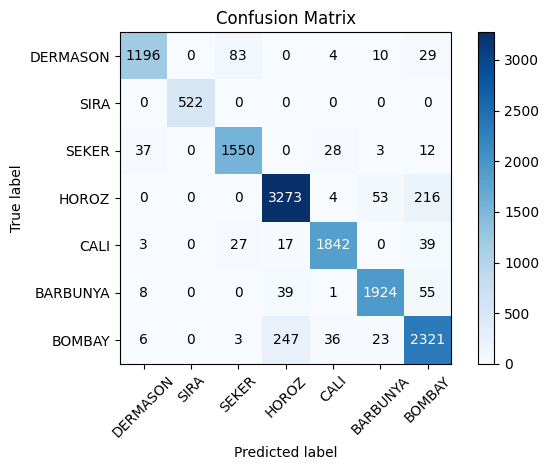

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt), ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Defining the class labels
classes = ['DERMASON', 'SIRA', 'SEKER','HOROZ', 'CALI', 'BARBUNYA','BOMBAY']

# Plot the confusion matrix
plot_confusion_matrix(confusion_mat, classes)

# Show the plot
plt.show()


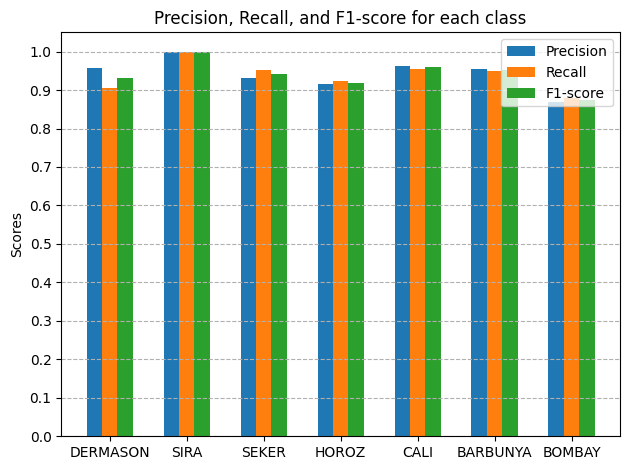

In [18]:
# Extract true positives, false positives, and false negatives from the confusion matrix
tp = np.diag(confusion_mat)
fp = np.sum(confusion_mat, axis=0) - tp
fn = np.sum(confusion_mat, axis=1) - tp

# Calculating precision, recall, and F1-score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Defining the class labels
classes = ['DERMASON', 'SIRA', 'SEKER','HOROZ', 'CALI', 'BARBUNYA','BOMBAY']
# Plotting individual values for each class
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score for each class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

tick_values = np.arange(0, 1.1, 0.1)
plt.yticks(tick_values)
ax.grid(True, axis='y', linestyle='--')

fig.tight_layout()

# Show the plot
plt.show()



In [19]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score

# Separate the features (X) and the target variable (y)
X = df_pca.drop('Class', axis=1)
y = df_pca['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the desired parameters for the KNN model
knn_params = {
    'n_neighbors': 5,
    'weights': 'uniform',
    'algorithm': 'auto'
}

# Create a KNN classifier with the specified parameters
knn = KNeighborsClassifier(**knn_params)

# Perform k-fold cross-validation on the training data
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores
scores = cross_val_score(knn, X_train, y_train, cv=kf)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold} Accuracy:", score)

# Calculate and print the average accuracy across all folds
average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)

# Train the KNN classifier on the entire training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fold 1 Accuracy: 0.9247015610651974
Fold 2 Accuracy: 0.9146005509641874
Fold 3 Accuracy: 0.9219467401285583
Fold 4 Accuracy: 0.9292929292929293
Fold 5 Accuracy: 0.9292929292929293
Fold 6 Accuracy: 0.9090909090909091
Fold 7 Accuracy: 0.9127640036730946
Fold 8 Accuracy: 0.9247015610651974
Fold 9 Accuracy: 0.9136029411764706
Fold 10 Accuracy: 0.9200367647058824
Average Accuracy: 0.9200030890455355
Test Accuracy: 0.9181050312155711


In [20]:
y_pred = cross_val_predict(knn, X, y, cv=kf)

# Calculate and display the confusion matrix
confusion_mat = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1184    0   94    0    5   10   29]
 [   0  522    0    0    0    0    0]
 [  48    0 1542    0   24    3   13]
 [   0    0    0 3260    6   52  228]
 [   3    0   36   14 1826    0   49]
 [  11    0    1   48    1 1913   53]
 [   9    0    7  286   34   34 2266]]


Confusion matrix, without normalization


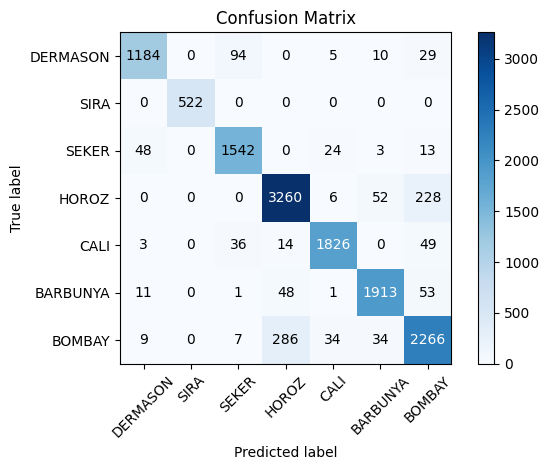

In [21]:
plot_confusion_matrix(confusion_mat, classes)

# Show the plot
plt.show()

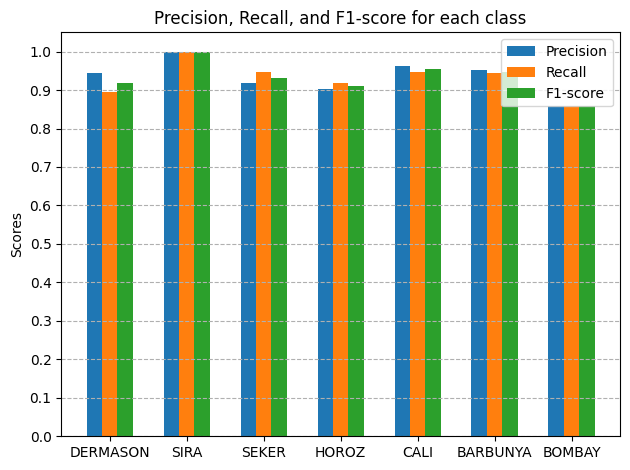

In [22]:
tp = np.diag(confusion_mat)
fp = np.sum(confusion_mat, axis=0) - tp
fn = np.sum(confusion_mat, axis=1) - tp

# Calculate precision, recall, and F1-score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Define the class labels
classes = ['DERMASON', 'SIRA', 'SEKER','HOROZ', 'CALI', 'BARBUNYA','BOMBAY']
# Plotting individual values for each class
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score for each class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

tick_values = np.arange(0, 1.1, 0.1)
plt.yticks(tick_values)
ax.grid(True, axis='y', linestyle='--')

fig.tight_layout()

# Show the plot
plt.show()


In [23]:
from sklearn.metrics import classification_report



# Extract the number of classes
num_classes = confusion_mat.shape[0]

# Calculate the total number of samples
total_samples = confusion_mat.sum()

# Calculate the true positives for each class
true_positives = confusion_mat.diagonal()

# Calculate the false positives for each class
false_positives = confusion_mat.sum(axis=0) - true_positives

# Calculate the false negatives for each class
false_negatives = confusion_mat.sum(axis=1) - true_positives

# Calculate the support for each class
support = true_positives + false_negatives

# Calculate precision, recall, and F1-score for each class
precision = true_positives / (true_positives + false_positives)
recall = true_positives / support
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = true_positives.sum() / total_samples

# Create a list of class labels
class_labels = ['DERMASON', 'SIRA', 'SEKER','HOROZ', 'CALI', 'BARBUNYA','BOMBAY']

# Display the classification report
print("Classification Report:")
print("{:<10} {:<10} {:<10} {:<10} {:<10}".format('Class', 'Precision', 'Recall', 'F1-Score', 'Support'))
for i in range(num_classes):
    print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f} {:<10}".format(class_labels[i], precision[i], recall[i], f1_score[i], support[i]))
print("Accuracy: {:.2f}".format(accuracy))


Classification Report:
Class      Precision  Recall     F1-Score   Support   
DERMASON   0.94       0.90       0.92       1322      
SIRA       1.00       1.00       1.00       522       
SEKER      0.92       0.95       0.93       1630      
HOROZ      0.90       0.92       0.91       3546      
CALI       0.96       0.95       0.96       1928      
BARBUNYA   0.95       0.94       0.95       2027      
BOMBAY     0.86       0.86       0.86       2636      
Accuracy: 0.92


In [30]:
from sklearn.utils.extmath import density
from sklearn import metrics
import time

#function to calculate time code from scikit learn documentaion
def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
#calculating training time
    t0 = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - t0
    print(f"train time: {train_time:.3}s")
#calculating test time
    t0 = time.time()
    pred = clf.predict(X_test)
    test_time = time.time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
results = []
for clf, name in (
    
    (KNeighborsClassifier(**knn_params), "kNN"),
    (SVC(**svm_params),"SVC"),
    (RandomForestClassifier(), "Random Forest"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier()
train time: 0.0154s
test time:  0.058s
accuracy:   0.918

SVC
________________________________________________________________________________
Training: 
SVC()
train time: 0.378s
test time:  0.451s
accuracy:   0.931

Random Forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 2.41s
test time:  0.0495s
accuracy:   0.925

